In [3]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [18]:
def get_label_depence(h_internet):
    if h_internet < 1:
        return 'no addiction'
    if 1 <= h_internet < 3:
        return 'low addiction'
    if 3 <= h_internet < 10:
        return 'medium addiction'
    if h_internet > 10:
        return 'high addiction'

In [19]:
df = pd.read_csv('var10.tsv', sep='\t')
df = df.dropna()

In [20]:
df['label_addiction'] = df['Internet use (mean hours per week)'].apply(get_label_depence)

In [36]:
df = df.sort_values('label_addiction', ascending=False)
df

,Internet use (mean hours per week),DepressionBefore,DepressionAfter,Gender,Age,Household income ($000),label_addiction
82,0.017644,0.466614,0.142853,female,Adult,25.00,no addiction
98,0.778388,0.799927,0.785645,male,Adult,85.00,no addiction
27,0.781375,0.333313,0.357117,female,Adult,73.75,no addiction
28,0.839920,1.399902,1.214111,male,Adult,73.75,no addiction
162,0.189075,0.933228,0.642822,female,Teen,27.50,no addiction
...,...,...,...,...,...,...,...
135,19.691080,1.533203,1.785645,male,Teen,42.50,high addiction
141,35.618620,0.866577,1.142822,male,Teen,62.50,high addiction
161,13.350670,0.733276,0.428528,male,Teen,27.50,high addiction
89,12.759060,0.399963,0.428528,male,Adult,62.50,high addiction


# EDA (exploratory data analysis)
### №1. Базовые распределения и зависимости между группами

В качестве групп взялась статья о классификации интернет зависимости и по ней бралось разбиение на 4 группы по степени зависимости от интернета, получились данные распределения.

(Осталось доказать, что выборка репрезентативна)

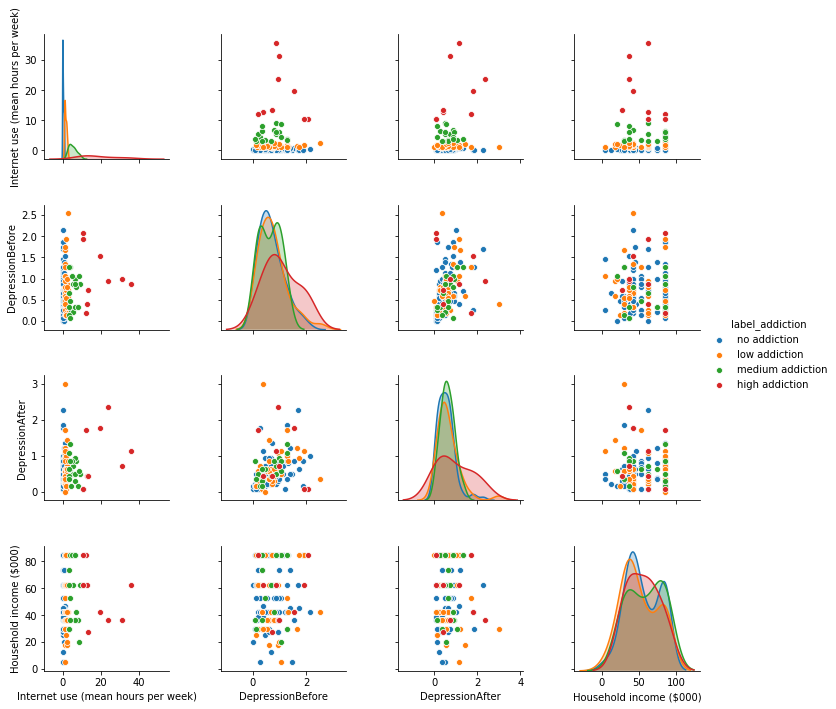

In [35]:
sns.pairplot(df, hue='label_addiction', hue_order=['no addiction', 'low addiction', 'medium addiction', 'high addiction'])

## №2. В целом насколько люди несчастны без зависимости и насколько помогает "лечение"

Гипотезы: 
1. Видно, что в целом подростки больше подвержены депрессии.
2. Также видно, что подросткам лучше помогает "лечение".
3. Лечение не помогает сильнозависимым взрослым, после лечения становится только хуже.

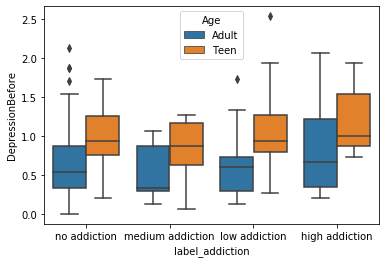

In [57]:
sns.boxplot(x = df['label_addiction'], y = df['DepressionBefore'], hue=df['Age']); 

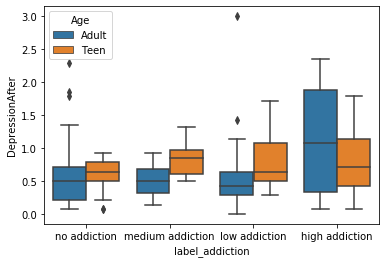

In [56]:
sns.boxplot(x = df['label_addiction'], y = df['DepressionAfter'], hue=df['Age']);

In [43]:
df['diff_after'] = df['DepressionBefore'] - df['DepressionAfter']

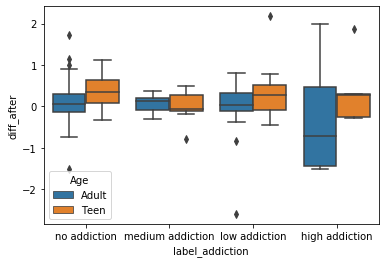

In [55]:
sns.boxplot(x = df['label_addiction'], y = df['diff_after'], hue=df['Age']);

## №3. Статистики

In [59]:
df.describe()

,Internet use (mean hours per week),DepressionBefore,DepressionAfter,Household income ($000),diff_after
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,2.314492,0.733715,0.615468,54.516129,0.118248
std,4.951686,0.496209,0.469026,22.810186,0.563430
min,0.000000,0.000000,0.000000,5.000000,-2.600037
25%,0.175031,0.333313,0.285706,36.458335,-0.140457
50%,0.781375,0.666626,0.500000,52.500000,0.090454
75%,1.962438,1.000000,0.785645,85.000000,0.364197
max,35.618620,2.533203,3.000000,85.000000,2.176086


In [63]:
df.groupby(['Age', 'Gender', 'label_addiction'])['DepressionBefore', 'DepressionAfter'].describe()

DepressionBefore                                \
                                         count      mean       std       min   
Age   Gender label_addiction                                                   
Adult female high addiction                3.0  1.066539  0.940326  0.199982   
             low addiction                13.0  0.528907  0.373776  0.133331   
             medium addiction              5.0  0.453320  0.306963  0.266663   
             no addiction                 42.0  0.666854  0.517408  0.000000   
      male   high addiction                1.0  0.399963       NaN  0.399963   
             low addiction                14.0  0.647579  0.392568  0.133331   
             medium addiction              6.0  0.635671  0.380333  0.133331   
             no addiction                 32.0  0.628089  0.413465  0.000000   
Teen  female high addiction                2.0  1.466552  0.659805  1.000000   
             low addiction                 9.0  1.133247  0.777398  0.266663   
             medium addiction              5.0  1.053272  0.218081  0.799927   
             no addiction                  8.0  0.974934  0.380353  0.199982   
      male   high addiction                3.0  1.044352  0.428572  0.733276   
             low addiction                 4.0  1.049927  0.157549  0.933228   
             medium addiction              2.0  0.266640  0.282806  0.066666   
             no addiction                  6.0  0.988810  0.448981  0.599976   

                                                                       \
                                    25%       50%       75%       max   
Age   Gender label_addiction                                            
Adult female high addiction    0.566605  0.933228  1.499817  2.066406   
             low addiction     0.199982  0.399963  0.733276  1.333252   
             medium addiction  0.333313  0.333313  0.333313  1.000000   
             no addiction      0.339264  0.533325  0.833252  2.133301   
      male   high addiction    0.399963  0.399963  0.399963  0.399963   
             low addiction     0.483292  0.599976  0.733276  1.733154   
             medium addiction  0.327354  0.766602  0.866577  1.066650   
             no addiction      0.266663  0.533325  0.883240  1.533203   
Teen  female high addiction    1.233276  1.466552  1.699829  1.933105   
             low addiction     0.533325  0.866577  1.666504  2.533203   
             medium addiction  0.866577  1.066650  1.266602  1.266602   
             no addiction      0.899903  0.966614  1.216614  1.466553   
      male   high addiction    0.799926  0.866577  1.199890  1.533203   
             low addiction     0.933228  0.999939  1.116638  1.266602   
             medium addiction  0.166653  0.266640  0.366627  0.466614   
             no addiction      0.683289  0.799926  1.216583  1.733154   

                              DepressionAfter                                \
                                        count      mean       std       min   
Age   Gender label_addiction                                                  
Adult female high addiction               3.0  1.380824  1.178642  0.071426   
             low addiction               13.0  0.675794  0.762434  0.071426   
             medium addiction             5.0  0.427442  0.344242  0.142853   
             no addiction                42.0  0.549938  0.454338  0.071426   
      male   high addiction               1.0  0.428528       NaN  0.428528   
             low addiction               14.0  0.520375  0.365723  0.000000   
             medium addiction             6.0  0.559489  0.188507  0.357117   
             no addiction                32.0  0.555939  0.379478  0.071426   
Teen  female high addiction               2.0  0.392829  0.454533  0.071426   
             low addiction                9.0  0.785651  0.475093  0.285706   
             medium addiction             5.0  0.864209  0.342868  0.500000   
             no

In [65]:
df.groupby(['Age', 'Gender', 'label_addiction'])['diff_after', 'Household income ($000)'].describe()

diff_after                                \
                                   count      mean       std       min   
Age   Gender label_addiction                                             
Adult female high addiction          3.0 -0.314285  2.000393 -1.514129   
             low addiction          13.0 -0.146887  0.787210 -2.600037   
             medium addiction        5.0  0.025879  0.195097 -0.309509   
             no addiction           42.0  0.116916  0.476773 -0.742859   
      male   high addiction          1.0 -0.028565       NaN -0.028565   
             low addiction          14.0  0.127204  0.381654 -0.828491   
             medium addiction        6.0  0.076182  0.266500 -0.285736   
             no addiction           32.0  0.072150  0.436595 -1.518982   
Teen  female high addiction          2.0  1.073723  1.114338  0.285767   
             low addiction           9.0  0.347595  0.806438 -0.447570   
             medium addiction        5.0  0.189063  0.247648 -0.057129   
             no addiction            8.0  0.432389  0.411209  0.014282   
      male   high addiction          3.0 -0.074646  0.328781 -0.276245   
             low addiction           4.0  0.264252  0.295987 -0.138061   
             medium addiction        2.0 -0.483299  0.434292 -0.790390   
             no addiction            6.0  0.346003  0.512358 -0.328491   

                                                                       \
                                    25%       50%       75%       max   
Age   Gender label_addiction                                            
Adult female high addiction   -1.468917 -1.423706  0.285637  1.994980   
             low addiction    -0.157135 -0.076172  0.261887  0.476196   
             medium addiction  0.047607  0.077026  0.123810  0.190460   
             no addiction     -0.146419  0.047615  0.319008  1.723602   
      male   high addiction   -0.028565 -0.028565 -0.028565 -0.028565   
             low addiction    -0.001190  0.071427  0.382157  0.804687   
             medium addiction -0.129753  0.180969  0.230972  0.366577   
             no addiction     -0.094040  0.076180  0.270203  0.909485   
Teen  female high addiction    0.679745  1.073723  1.467701  1.861679   
             low addiction    -0.095215  0.223755  0.514221  2.176086   
             medium addiction -0.054687  0.195313  0.366577  0.495239   
             no addiction      0.115674  0.355469  0.566559  1.128525   
      male   high addiction   -0.264344 -0.252442  0.026153  0.304748   
             low addiction     0.165436  0.314210  0.413025  0.566650   
             medium addiction -0.636844 -0.483299 -0.329753 -0.176208   
             no addiction      0.040467  0.319031  0.626137  1.090332   

                              Household income ($000)                        \
                                                count       mean        std   
Age   Gender label_addiction                                                  
Adult female high addiction                       3.0  68.750000  28.145826   
             low addiction                       13.0  43.269231  20.618929   
             medium addiction                     5.0  63.250000  25.071772   
             no addiction                        42.0  50.615080  22.573322   
      male   high addiction                       1.0  62.500000        NaN   
             low addiction                       14.0  52.351191  24.727471   
             medium addiction                     6.0  64.583333  20.212414   
             no addiction                        32.0  60.169271  20.651860   
Teen  female high addiction                       2.0  49.375000  18.561553   
             low addiction                        9.0  55.000000  23.518610   
             medium addiction                     5.0  52.500000  30.720514   
             no addiction                         8.0  47.291666  27.196194   
      male   high addiction                       

# Исследование смещённости исправленной и обычной дисперсии

Исследование основано на равномерном распределении на $\xi \sim [0, 1]$.
$D(\xi) = \dfrac{1}{12}$


In [71]:
import random
import numpy as np

In [217]:
def m1(array):
    return sum(array) / len(array)
def m2(array):
    return sum(list(map(lambda x: x ** 2, array))) / len(array)
def D(array):
    return m2(array) - m1(array) ** 2
def D_corr(array):
    return len(array) / (len(array) - 1) * D(array)
def sample(size=10):
    array = np.random.uniform(low=0.0, high=1.0, size=10)
    return [D_corr(array), D(array)]

In [227]:
sample_size = 1000
sample_x = [[], []]
for i in range(sample_size):
    bies = [0, 0]
    size_iter = 1000
    for j in range(size_iter):
        d, d_true = sample()
        bies[0], bies[1] = bies[0] + d, bies[1] + d_true
    bies[0] = abs(bies[0]) / size_iter
    bies[1] = abs(bies[1]) / size_iter
    sample_x[0].append(bies[0])
    sample_x[1].append(bies[1])

In [228]:
df_bies = pd.DataFrame({'D_correct' : sample_x[0], 'D_simple' : sample_x[1], 'D_true' : [1/12] * sample_size})

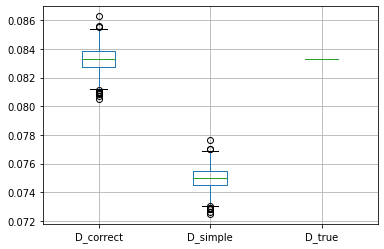

In [230]:
df_bies.boxplot();